# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Note: you may need to restart the kernel to use updated packages.


<h4># Import necessary libraries</h4>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

Number of unique job titles: 93

Average salary per work_year:
work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64


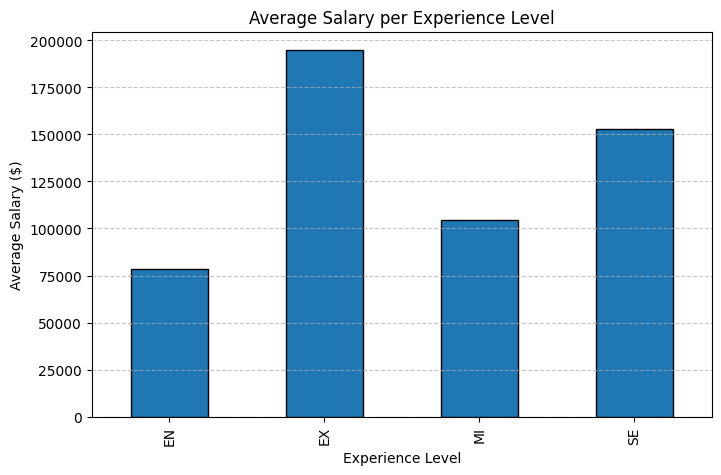

In [17]:
job_title = df['job_title'].nunique()
print("Number of unique job titles:", job_title)

#average salary (salary_in_usd) per work_year?
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()
print("\nAverage salary per work_year:")
print(avg_salary_per_year)

#average salary by experience_level
avg_salary_experience = df.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(8, 5))
avg_salary_experience.plot(kind='bar', edgecolor='black')
plt.title('Average Salary per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [20]:
feature = ['work_year', 'experience_level', 'job_title']
target = 'salary_in_usd'

# Encode categorical variables
le_exp = LabelEncoder()
le_job = LabelEncoder()

df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

# Define X (features) and y (target)
X = df[['work_year', 'experience_level_encoded', 'job_title_encoded']]
y = df['salary_in_usd']

# Display 
print("Encoded dataset preview:")
print(X.head())
print("Target variable preview:")
print(y.head())

Encoded dataset preview:
   work_year  experience_level_encoded  job_title_encoded
0       2023                         0                  8
1       2023                         0                  8
2       2023                         0                 41
3       2023                         0                 22
4       2023                         0                  8
Target variable preview:
0    213660
1    130760
2    100000
3     30000
4    204620
Name: salary_in_usd, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

#Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.17
RMSE: 58477.29


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [22]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level': ['EN', 'MI', 'SE', 'EX'],
    'job_title': ['Data Scientist'] * 4 
})

# Apply the same encoding as training data
future_data_encoded = pd.get_dummies(future_data, drop_first=True)

# Align columns with the training dataset (fill missing ones with 0)
future_data_encoded = future_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict using trained model
predicted_salaries = model.predict(future_data_encoded)

#Display 
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

print(" Predicted 2024 Salaries:")
print(results)

 Predicted 2024 Salaries:
  Experience Level  Predicted 2024 Salary (USD)
0            Entry                 97906.262416
1              Mid                 97906.262416
2           Senior                 97906.262416
3        Executive                 97906.262416


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

<h2>Does your model make reasonable predictions?</h2>
<h4>Yes overall the model predicts higher salaries for people with more experience, which is logical. However, the actual accuracy of those predictions is still limited.</h4>

<h2>What are the limitations of using only work_year and experience_level?</h2>
<h4>It doesn’t include other things that affect salary like job title, company, or location. So, the model is too simple.</h4>

<h2>How could you improve this model?</h2>
<h4>I can add more features, use better encoding for words, or try other models that handle non-linear data better.</h4>

<h2>Why is R² not enough to trust your predictions?</h2>
<h4>A strong R² value doesn’t guarantee reliable predictions—it may simply reflect how well the model fits the training data, not how well it generalizes to new data.</h4>

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀